# measure the scaling of applying a function to dataframes which vary in size

import python modules used in this notebook

In [1]:
import pandas
import numpy
import pickle
import matplotlib.pyplot as plt
import time

# First I'm going to show the outcome

create a function that doubles the value of column 'A'

In [2]:
def double_col_a(row):
    row_as_dict=dict(row)
    return row_as_dict['A']*2

To measure how well this scales, run 5 tests for a dataframe with 100 rows, then run 5 tests for a dataframe with 1000 rows, and finally run 5 tests for a dataframe with 10,000 rows.

In [3]:
number_of_tests=5
list_of_row_size=[100, 1000, 10000]

These nested loops implement the scaling experiment

In [4]:
serial_reslts={}
scaling_start=time.time()
for row_count in list_of_row_size:
    test_reslts=[]
    for test_indx in range(number_of_tests): # run the same experiment multiple times 
        # create a dataframe with random content of a specified size
        # this isn't the section relevant to the scaling measurement, so timing isn't performed
        df = pandas.DataFrame(
                numpy.random.randint(0,1000,
                                     size=(row_count, 4)), 
                                     columns=list('ABCD'))
        # wrap the line of the code we are measuring with timing 
        start_time = time.time()
        df['K'] = df.apply(double_col_a,axis=1)
        test_reslts.append(time.time() - start_time) # store elapsed time to a list

    # after running the experiment multiple times, record the average result to a dictionary
    serial_reslts[row_count]=sum(test_reslts)/number_of_tests
    
    # progress indicator as we scale up
    print('elapsed time:',round(time.time() - scaling_start,2),'for',row_count)

elapsed time: 0.03 for 100
elapsed time: 0.22 for 1000
elapsed time: 2.04 for 10000


The results from the experiment are stored in a dictionary. I've already averaged the measurements from the 10 runs.

In [5]:
serial_reslts

{100: 0.00568242073059082,
 1000: 0.03752455711364746,
 10000: 0.3643056392669678}

Plot the data to see linear scaling. I've included a linear fit of the data points.

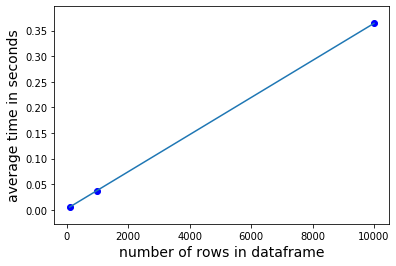

In [6]:
serial_x = list(serial_reslts.keys()) # list_of_row_size
serial_y = list(serial_reslts.values())
_=plt.scatter(serial_x,serial_y,color='blue')
_=plt.ylabel('average time in seconds',fontsize=14)
_=plt.xlabel('number of rows in dataframe',fontsize=14)

_=plt.plot(numpy.unique(serial_x), numpy.poly1d(numpy.polyfit(serial_x, serial_y, 1))(numpy.unique(serial_x))) # https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python

# Now I show how I created that code through iterative development

The `time.time()` command show what time it is in seconds since 12:00 am on January 1, 1970. This specific time is called "epoch." For more on that, see 

https://en.wikipedia.org/wiki/Epoch_(reference_date)#Computing

https://en.wikipedia.org/wiki/Unix_time

https://stackoverflow.com/questions/2533563/why-are-dates-calculated-from-january-1st-1970/2533567

In [7]:
time.time()

1618195019.788169

create a dataframe with randomly populated integers

In [8]:
start_time=time.time()
row_count=10000
df = pandas.DataFrame(numpy.random.randint(0,1000,
                                           size=(row_count, 4)), 
                                           columns=list('ABCD'))
print('cell elapsed:',round(time.time()-start_time,2),'seconds')

cell elapsed: 0.0 seconds


In [9]:
df.shape

(10000, 4)

In [10]:
df.head()

,A,B,C,D
0,439,897,594,721
1,723,632,498,493
2,565,995,90,75
3,67,709,945,275
4,737,773,505,502


Given a dataframe with numeric values, I create a simple function that can operate on the rows

In [11]:
def double_col_a(row):
    row_as_dict=dict(row)
    return row_as_dict['A']*2

To use the function, 

In [12]:
df['K'] = df.apply(double_col_a,axis=1)

The shape of the dataframe should be different because a new colum was added

In [13]:
df.shape

(10000, 5)

In [14]:
df.head()

,A,B,C,D,K
0,439,897,594,721,878
1,723,632,498,493,1446
2,565,995,90,75,1130
3,67,709,945,275,134
4,737,773,505,502,1474


In order to know how the function scales as the number of rows increases, I want to time that operation

<BR>
<BR>

To show the timing, I'll first reset the dataframe

In [15]:
df = pandas.DataFrame(numpy.random.randint(0,1000,
                                           size=(row_count, 4)), 
                                           columns=list('ABCD'))

In [16]:
start_time = time.time()
df['K'] = df.apply(double_col_a,axis=1)
print(time.time() - start_time,'seconds')

0.35828471183776855 seconds


Yay, a data point. Now we want to re-run that same test multiple times. 

Doing a task repeatedly means using a loop

In [17]:
number_of_tests=5
for test_indx in range(number_of_tests):
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    print(time.time() - start_time,'seconds')

0.43581318855285645 seconds
0.39962005615234375 seconds
0.43563222885131836 seconds
0.4286379814147949 seconds
0.41959095001220703 seconds


To ensure a fair test, reset the dataframe being used in every experiment

In [18]:
number_of_tests=5
for test_indx in range(number_of_tests):
    df = pandas.DataFrame(numpy.random.randint(0,1000,
                                               size=(row_count, 4)), 
                                               columns=list('ABCD'))
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    print(time.time() - start_time,'seconds')

0.351207971572876 seconds
0.36959218978881836 seconds
0.3714931011199951 seconds
0.3548469543457031 seconds
0.3701050281524658 seconds


Rather than print the results of each test to screen, save to a list

In [19]:
number_of_tests=5
test_reslts=[]
for test_indx in range(number_of_tests):
    df = pandas.DataFrame(numpy.random.randint(0,1000,
                                               size=(row_count, 4)), 
                                               columns=list('ABCD'))
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    test_reslts.append(time.time() - start_time)

In [20]:
print(test_reslts)

[0.35651302337646484, 0.3536849021911621, 0.3603048324584961, 0.3515300750732422, 0.3596329689025879]


Rather than caring about each outcome, I want to know the average outcome

In [21]:
serial_reslts=sum(test_reslts)/number_of_tests

In [22]:
print(serial_reslts,'seconds')

0.35633316040039065 seconds


Put the calculation of the average at the end of the loop

In [23]:
number_of_tests=5
test_reslts=[]
for test_indx in range(number_of_tests):
    df = pandas.DataFrame(numpy.random.randint(0,1000,
                                               size=(row_count, 4)), 
                                               columns=list('ABCD'))
    start_time = time.time()
    df['K'] = df.apply(double_col_a,axis=1)
    test_reslts.append(time.time() - start_time)
    
# after running the experiment multiple times, record the average result to a dictionary
serial_reslts=sum(test_reslts)/number_of_tests

In [24]:
print(serial_reslts,'seconds')

0.3563088893890381 seconds


That was 5 tests of the timing for a dataframe where row_count=10000

In order to determine how the `double_col_a` function scales, we need to alter how many rows are in the dataframe

In [25]:
number_of_tests=5
list_of_row_size=[100, 1000, 10000]

Create a loop that runs tests for each of these row counts

Rather than store the test results to a scalar, store to a dictionary. The dictionary key is the number of rows in the dataframe.

In [26]:
serial_reslts={}
for row_count in list_of_row_size:
    test_reslts=[]
    for test_indx in range(number_of_tests):
        df = pandas.DataFrame(
                numpy.random.randint(0,1000,
                                     size=(row_count, 4)), 
                                     columns=list('ABCD'))
        start_time = time.time()
        df['K'] = df.apply(double_col_a,axis=1)
        test_reslts.append(time.time() - start_time)
        
    # after running the experiment multiple times, record the average result to a dictionary
    serial_reslts[row_count]=sum(test_reslts)/number_of_tests

In [27]:
print(serial_reslts)

{100: 0.005198478698730469, 1000: 0.03824262619018555, 10000: 0.3595461368560791}


Now we can plot

Text(0.5, 1.0, 'timing a function call')

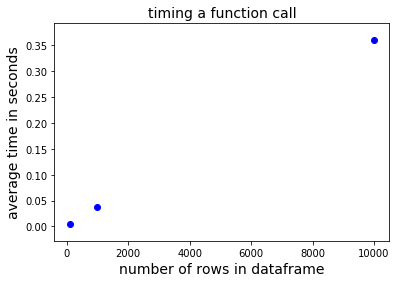

In [28]:
serial_x = list(serial_reslts.keys()) # list_of_row_size
serial_y = list(serial_reslts.values())
_=plt.scatter(serial_x,serial_y,color='blue')
_=plt.ylabel('average time in seconds',fontsize=14)
_=plt.xlabel('number of rows in dataframe',fontsize=14)
plt.title('timing a function call',fontsize=14)

And to provide a guide for the reader's eye, add a linear fit

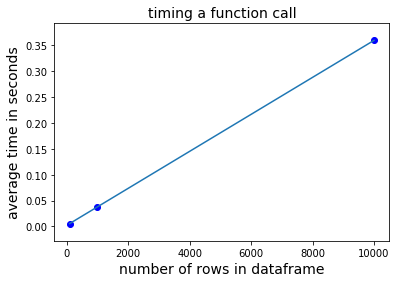

In [29]:
serial_x = list(serial_reslts.keys()) # list_of_row_size
serial_y = list(serial_reslts.values())
plt.scatter(serial_x,serial_y,color='blue')
plt.ylabel('average time in seconds',fontsize=14)
plt.xlabel('number of rows in dataframe',fontsize=14)
plt.title('timing a function call',fontsize=14)

plt.plot(numpy.unique(serial_x), numpy.poly1d(numpy.polyfit(serial_x, serial_y, 1))(numpy.unique(serial_x))); # https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python